In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Example dataset
data = {
    'Population': [5000, 7000, 8000, 10000, 15000, 20000, 25000, 30000, 35000, 40000],
    'Profit': [50000, 70000, 80000, 90000, 100000, 120000, 130000, 140000, 150000, 160000]
}

df = pd.DataFrame(data)
print(df)


   Population  Profit
0        5000   50000
1        7000   70000
2        8000   80000
3       10000   90000
4       15000  100000
5       20000  120000
6       25000  130000
7       30000  140000
8       35000  150000
9       40000  160000


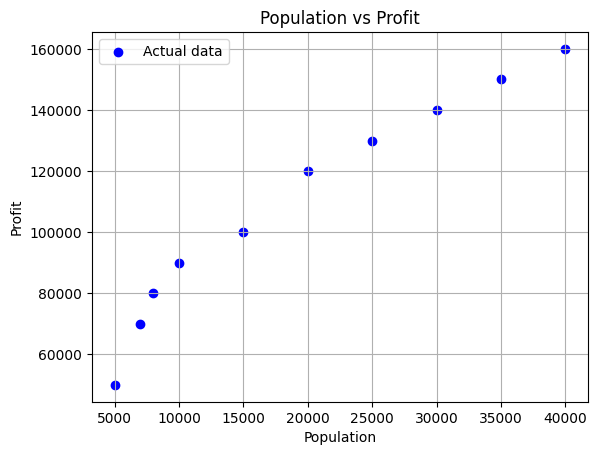

In [12]:
data = {
    'Population': [5000, 7000, 8000, 10000, 15000, 20000, 25000, 30000, 35000, 40000],
    'Profit': [50000, 70000, 80000, 90000, 100000, 120000, 130000, 140000, 150000, 160000]
}

# Convert to a DataFrame
df = pd.DataFrame(data)

# Plot the data
plt.scatter(df['Population'], df['Profit'], color='blue', label='Actual data')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Population vs Profit')
plt.legend()
plt.grid(True)
plt.show()

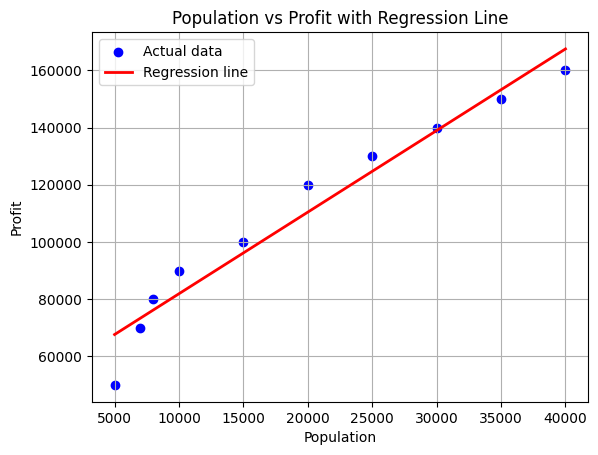

In [7]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Features (independent variable) and target (dependent variable)
X = df[['Population']]
y = df['Profit']

# Create and train the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict using the model
predictions = model.predict(X)

# Plot the data and the regression line
plt.scatter(df['Population'], df['Profit'], color='blue', label='Actual data')
plt.plot(df['Population'], predictions, color='red', linewidth=2, label='Regression line')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Population vs Profit with Regression Line')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Predicting profit for a new population value
new_population = np.array([[30000]])  # Example population
predicted_profit = model.predict(new_population)

print(f"Predicted profit for population of 60,000: ${predicted_profit[0]:,.2f}")


Predicted profit for population of 60,000: $138,962.78


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


NOW PLOYNOMIAL REGRESSION

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [14]:
# Sample data
data = {
    'Area': [800, 1000, 1200, 1500, 1800, 2000, 2200, 2500, 2800, 3000],
    'Price': [150, 200, 250, 350, 400, 500, 600, 650, 700, 800]
}

df = pd.DataFrame(data)

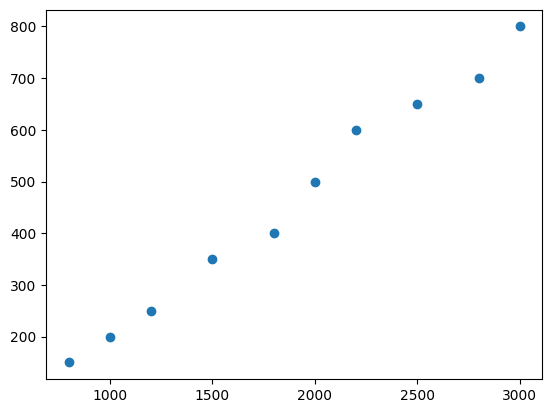

In [17]:
plt.scatter(df['Area'],df['Price'])

In [18]:
X = df[['Area']].values  # Features (independent variable)
y = df['Price'].values   # Target (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [19]:
poly = PolynomialFeatures(degree=3)  # Cubic polynomial
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)


In [20]:
model = LinearRegression()
model.fit(X_poly_train, y_train)


LinearRegression()

In [21]:
y_pred = model.predict(X_poly_test)


In [22]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1267.312958833795


<ipython-input-23-c626a8bf37db>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)  # Higher resolution for smooth curve


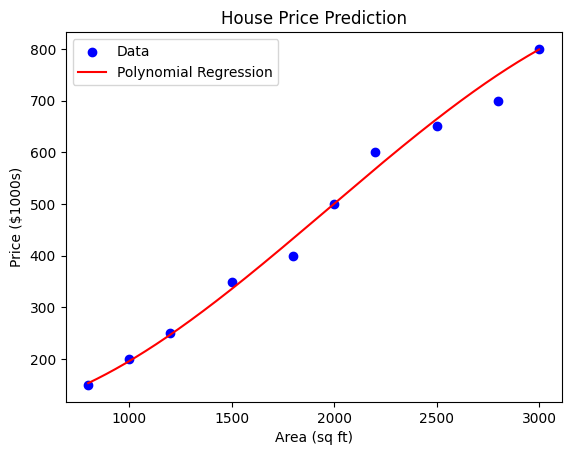

In [23]:
# Plotting the results
plt.scatter(X, y, color='blue', label='Data')
X_grid = np.arange(min(X), max(X), 0.1)  # Higher resolution for smooth curve
X_grid = X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, model.predict(poly.transform(X_grid)), color='red', label='Polynomial Regression')

plt.title('House Price Prediction')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($1000s)')
plt.legend()
plt.show()


POLYNOMIAL REGRESSION WITH MULTIPLE FEATURES

Model Coefficients: [ 2.15211733e+00  4.61101399e-03  4.61101399e-03  9.42113442e-04
 -1.01981352e-04]
Intercept: -0.9583333333333393
Mean Squared Error: 0.0005308857808857903


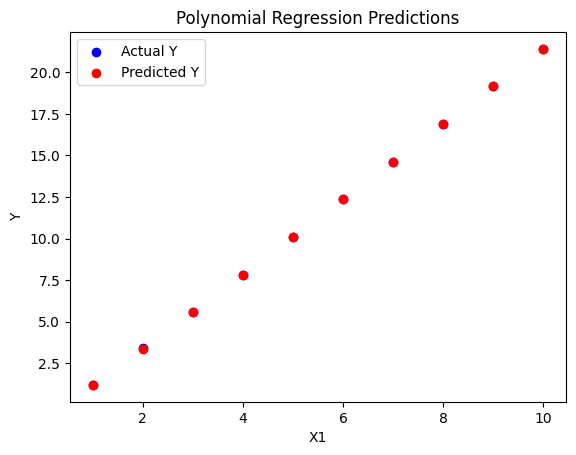

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Sample data with two features
data = {
    'X1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'X2': [1, 4, 9, 16, 25, 36, 49, 64, 81, 100],
    'Y': [1.2, 3.4, 5.6, 7.8, 10.1, 12.4, 14.6, 16.9, 19.2, 21.4]
}

df = pd.DataFrame(data)

# Features and target variable
X = df[['X1', 'X2']]
y = df['Y']

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)  # Degree 2 polynomial features
X_poly = poly.fit_transform(X)

# Create and train the model
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions
y_pred = model.predict(X_poly)

# Print model coefficients
print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Calculate mean squared error
mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

# Plotting the results (for visualization purposes, here using 2D data)
plt.scatter(X['X1'], y, color='blue', label='Actual Y')
plt.scatter(X['X1'], y_pred, color='red', label='Predicted Y')
plt.xlabel('X1')
plt.ylabel('Y')
plt.title('Polynomial Regression Predictions')
plt.legend()
plt.show()
